### Task 1 : Load and inspect the data [10 marks]

1) Import all and only the necessary libraries (covered in the lectures, no others required). 

In [58]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from pandas.api.types import is_numeric_dtype

import keras
from keras.models import Sequential
from keras.layers import Dense, Normalization

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8] 


2) Load the dataset into a Pandas DataFrame using the following column names
*'ID, 'senior', 'tenure', 'streaming', 'contract', 'payMethod',
'monthlyCharges', 'totalCharges', 'churn'*

In [59]:
columns = ['ID', 'senior', 'tenure', 'streaming', 
           'contract', 'payMethod', 'monthlyCharges', 
           'totalCharges', 'churn']

In [60]:
data = pd.read_csv('CustomerChurn.csv', names = columns, header = 0)


3) Display the first 5 rows, check the shape and datatypes, and iden.fy missing values

In [61]:
data.head()

,ID,senior,tenure,streaming,contract,payMethod,monthlyCharges,totalCharges,churn
0,5575-GNVDE,0.0,34.0,No,One year,Mailed check,56.95,1889.50,No
1,3668-QPYBK,0.0,2.0,No,Month-to-month,Mailed check,53.85,108.15,Yes
2,7795-CFOCW,0.0,45.0,No,One year,Bank transfer (automatic),42.30,1840.75,No
3,9237-HQITU,0.0,2.0,No,Month-to-month,Electronic check,70.70,151.65,Yes
4,9305-CDSKC,NaN,NaN,Yes,NaN,NaN,99.65,NaN,Yes


In [62]:
data.shape

(7042, 9)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              7042 non-null   object 
 1   senior          7039 non-null   float64
 2   tenure          7020 non-null   float64
 3   streaming       7041 non-null   object 
 4   contract        7040 non-null   object 
 5   payMethod       7041 non-null   object 
 6   monthlyCharges  7040 non-null   float64
 7   totalCharges    7041 non-null   object 
 8   churn           7042 non-null   object 
dtypes: float64(3), object(6)
memory usage: 495.3+ KB


In [64]:
data.describe()

,senior,tenure,monthlyCharges
count,7039.000000,7020.000000,7040.000000
mean,0.162239,32.370513,64.757997
std,0.368696,24.569394,30.088687
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Task 2 : Initial preprocessing (basic cleaning) & split [20 marks]

1) perform basic preprocessing (before data split). You need to handle missing values (and decide which
strategy to adopt for this), convert data types where necessary, remove irrelevant columns, etc. Jus.fy
each choice as a code comment.

In [65]:
DataForTraining = data.copy()

In [66]:
# Convert 'totalCharges' to numeric. Some values may be empty strings or invalid → coerce to NaN
DataForTraining['totalCharges'] = pd.to_numeric(DataForTraining['totalCharges'], errors = 'coerce')

In [67]:
DataForTraining['totalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7042 entries, 0 to 7041
Series name: totalCharges
Non-Null Count  Dtype  
--------------  -----  
7030 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [68]:
# 'ID' is just an identifier, won't help prediction → drop it
DataForTraining = DataForTraining.drop(columns=['ID'])

In [69]:
# checking the count of missing values
DataForTraining.isnull().sum()

senior             3
tenure            22
streaming          1
contract           2
payMethod          1
monthlyCharges     2
totalCharges      12
churn              0
dtype: int64

In [70]:
numeric_cols = ['senior', 'tenure', 'monthlyCharges', 'totalCharges']

# Check skewness
DataForTraining[numeric_cols].skew()

senior            1.832713
tenure            0.239191
monthlyCharges   -0.220456
totalCharges      0.961272
dtype: float64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              7042 non-null   object 
 1   senior          7039 non-null   float64
 2   tenure          7020 non-null   float64
 3   streaming       7041 non-null   object 
 4   contract        7040 non-null   object 
 5   payMethod       7041 non-null   object 
 6   monthlyCharges  7040 non-null   float64
 7   totalCharges    7041 non-null   object 
 8   churn           7042 non-null   object 
dtypes: float64(3), object(6)
memory usage: 495.3+ KB


2) Split your dataset into training and tes.ng sets. Your target is totalCharges. Use an 80/20 split. Keep the
random state fixed for reproducibility. You will need to use the same data for both models of Task 5 and
Task 6. Remember: your models will have to output the feature totalCharges.
Constraint. The random key for the split should be the first 2 digits in your raptor username, e.g., if your usename
is lb514 then you need to set random_state=51.
- If your username only has one digit choose that as your key.
- If your username has no digits then choose 42 as your key. 

In [72]:
DataForTraining['totalCharges'] = DataForTraining.pop('totalCharges')   # keeping totalCharges at the end


In [73]:

X = DataForTraining.loc[:, 'senior':'churn']   # all columns from senior to churn
y = DataForTraining['totalCharges']            # target variable


In [74]:
X

,senior,tenure,streaming,contract,payMethod,monthlyCharges,churn
0,0.0,34.0,No,One year,Mailed check,56.95,No
1,0.0,2.0,No,Month-to-month,Mailed check,53.85,Yes
2,0.0,45.0,No,One year,Bank transfer (automatic),42.30,No
3,0.0,2.0,No,Month-to-month,Electronic check,70.70,Yes
4,NaN,NaN,Yes,NaN,NaN,99.65,Yes
...,...,...,...,...,...,...,...
7037,NaN,NaN,NaN,One year,Mailed check,NaN,No
7038,0.0,72.0,Yes,One year,Credit card (automatic),103.20,No
7039,0.0,11.0,No,Month-to-month,Electronic check,29.60,No
7040,1.0,4.0,No,Month-to-month,Mailed check,74.40,Yes


In [75]:
# as my username is ys321 so random_state = 32

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size =0.2, random_state = 32)

In [76]:
Xtrain.shape[0] + Xtest.shape[0] == X.shape[0]


True

In [77]:
# --- Numeric features ---
numericCols = ['tenure', 'monthlyCharges']
categoricalCols = ['streaming', 'contract', 'payMethod', 'churn', 'senior']

# -- Compute fill values from TRAINING set 
train_means = Xtrain[numericCols].mean()
train_modes = Xtrain[categoricalCols].mode().iloc[0]

# --- Impute TRAINING set ---
Xtrain[numericCols] = Xtrain[numericCols].fillna(train_means)
Xtrain[categoricalCols] = Xtrain[categoricalCols].fillna(train_modes)
ytrain = ytrain.fillna(ytrain.mean())  # target

# --- Apply SAME fill values to TEST set ---
Xtest[numericCols] = Xtest[numericCols].fillna(train_means)
Xtest[categoricalCols] = Xtest[categoricalCols].fillna(train_modes)
ytest = ytest.fillna(ytrain.mean())    # use TRAIN mean to prevent leakage


In [78]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 1973 to 1697
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   senior          1409 non-null   float64
 1   tenure          1409 non-null   float64
 2   streaming       1409 non-null   object 
 3   contract        1409 non-null   object 
 4   payMethod       1409 non-null   object 
 5   monthlyCharges  1409 non-null   float64
 6   churn           1409 non-null   object 
dtypes: float64(3), object(4)
memory usage: 88.1+ KB


In [79]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5633 entries, 4361 to 2775
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   senior          5633 non-null   float64
 1   tenure          5633 non-null   float64
 2   streaming       5633 non-null   object 
 3   contract        5633 non-null   object 
 4   payMethod       5633 non-null   object 
 5   monthlyCharges  5633 non-null   float64
 6   churn           5633 non-null   object 
dtypes: float64(3), object(4)
memory usage: 352.1+ KB


In [80]:
ytrain.isnull().sum()

0

In [81]:
ytest.isnull().sum()

0

### Task 3: Further preprocessing (post-split) [20 marks]

Apply transforma.ons that learn from data, such as impu.ng that may have caused leaking if done in Task 1, and
encoding of categorical variables.
*Hint. Transforma2ons need to be applied to both training and test sets, but fiFng them only on the training set*

In [22]:
DataForTraining

,senior,tenure,streaming,contract,payMethod,monthlyCharges,churn,totalCharges
0,0.0,34.0,No,One year,Mailed check,56.95,No,1889.50
1,0.0,2.0,No,Month-to-month,Mailed check,53.85,Yes,108.15
2,0.0,45.0,No,One year,Bank transfer (automatic),42.30,No,1840.75
3,0.0,2.0,No,Month-to-month,Electronic check,70.70,Yes,151.65
5,0.0,22.0,No,Month-to-month,Credit card (automatic),89.10,No,1949.40
...,...,...,...,...,...,...,...,...
7035,0.0,12.0,Yes,One year,Electronic check,60.65,No,743.30
7036,0.0,72.0,No internet service,Two year,Bank transfer (automatic),21.15,No,1419.40
7038,0.0,72.0,Yes,One year,Credit card (automatic),103.20,No,7362.90
7039,0.0,11.0,No,Month-to-month,Electronic check,29.60,No,346.45


In [82]:
categoricalCols = ['streaming','contract','payMethod', 'churn']
encoder = OneHotEncoder(sparse_output = False)

Xtrain_encoded = encoder.fit_transform(Xtrain[categoricalCols])
Xtest_encoded = encoder.transform(Xtest[categoricalCols])

In [83]:
Xtrain_encoded.shape

(5633, 12)

In [84]:
# assign names to the new columns

encoded_cols  = encoder.get_feature_names_out(categoricalCols)

In [85]:
encoded_cols

array(['streaming_No', 'streaming_No internet service', 'streaming_Yes',
       'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'payMethod_Bank transfer (automatic)',
       'payMethod_Credit card (automatic)', 'payMethod_Electronic check',
       'payMethod_Mailed check', 'churn_No', 'churn_Yes'], dtype=object)

In [86]:
for i,col_name in enumerate(encoded_cols):
    Xtrain[col_name] = Xtrain_encoded[:, i]
    Xtest[col_name] = Xtest_encoded[:,i]


Xtrain = Xtrain.drop(columns = categoricalCols)
Xtest = Xtest.drop(columns = categoricalCols)

In [87]:
Xtrain

,senior,tenure,monthlyCharges,streaming_No,streaming_No internet service,streaming_Yes,contract_Month-to-month,contract_One year,contract_Two year,payMethod_Bank transfer (automatic),payMethod_Credit card (automatic),payMethod_Electronic check,payMethod_Mailed check,churn_No,churn_Yes
4361,0.0,49.0,20.70,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3403,0.0,35.0,55.60,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2983,0.0,26.0,26.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5472,0.0,20.0,49.60,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1554,0.0,53.0,106.10,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,0.0,72.0,110.45,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2940,0.0,72.0,97.95,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1334,0.0,2.0,45.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1579,1.0,21.0,71.70,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Task 4: Decision Tree Regression [20 marks]
Train a DecisionTreeRegressor with the training data, and predict on the test data. Your model will predict the
feature totalCharges. Evaluate using the 𝑅" score (also known as coefficient of determina.on) and plot predicted
vs. actual values.

In [88]:
reg_tree = DecisionTreeRegressor ()
reg_tree.fit(Xtrain, ytrain)

# predict on test

y__ = reg_tree.predict(Xtest)

r2 = r2_score(ytest, y__)

In [89]:
r2

0.9944730809771642

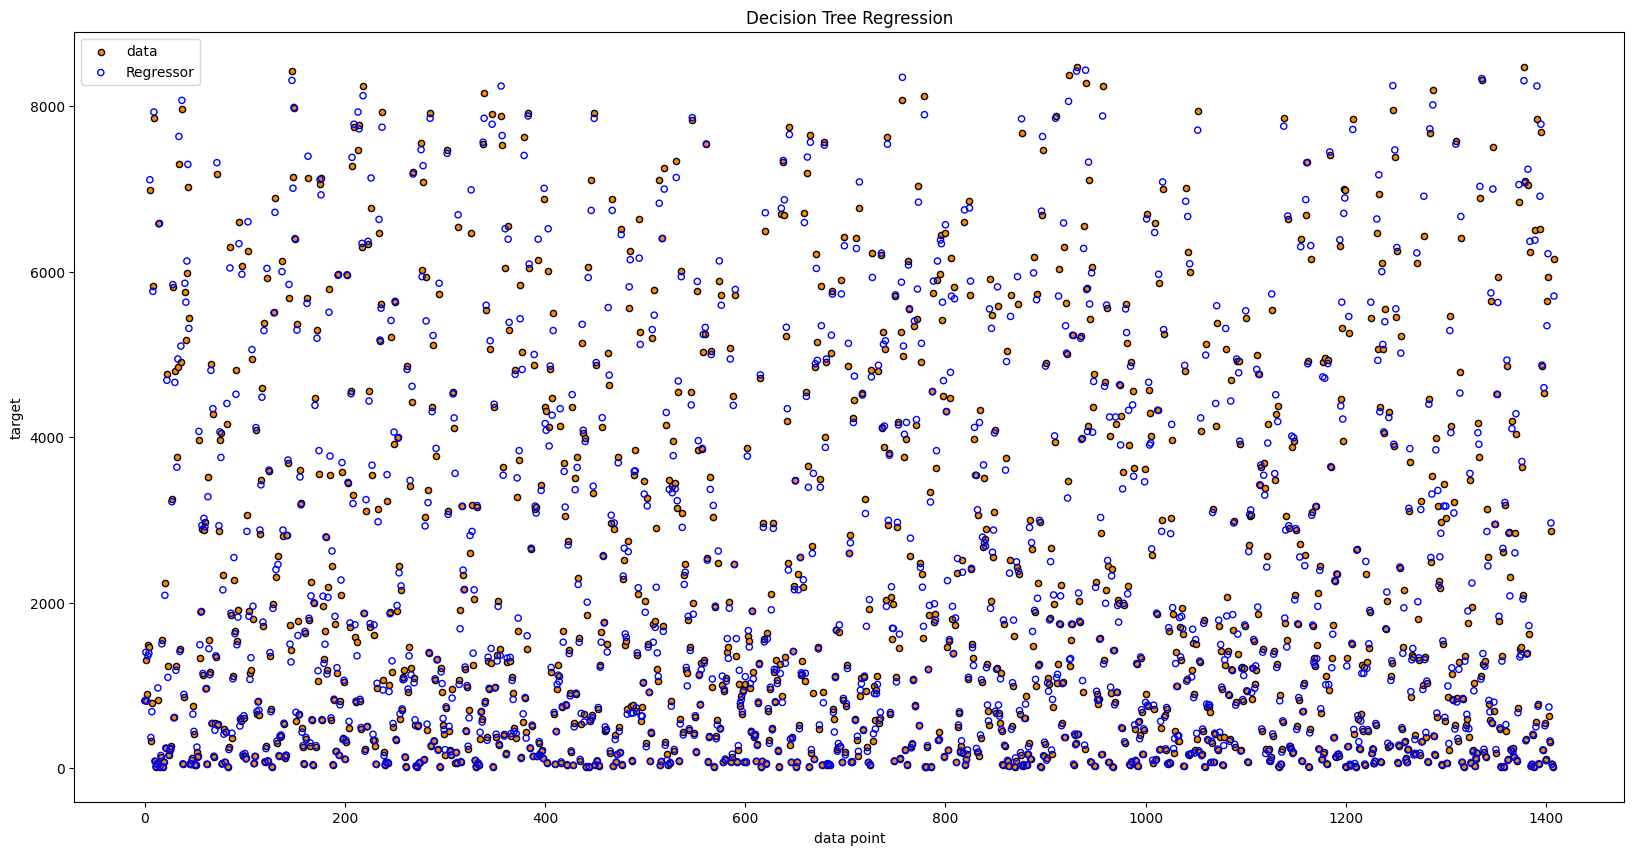

In [90]:
indicies = np.arange (len(ytest))

plt.figure (figsize=(20, 10))

plt.scatter (indicies, ytest, s=20, edgecolor="black", c="darkorange", label="data")
plt.scatter (indicies, y__, s=20, edgecolor="blue", c="none", label="Regressor")

plt.xlabel ("data point")
plt.ylabel ("target")
plt.title ("Decision Tree Regression")
plt.legend ()

plt.show ()

### Task 5: Neural Network Regression (Keras) [30 marks]

1) Make sure numeric data is normalized (only use methods we have seen in lectures/classes). 

In [91]:
toscale = ['tenure', 'monthlyCharges']

def zscale(df):
    df_scaled = df.copy()
    for col in toscale:
        df_scaled[col] = (df[col] - df[col].mean()) / df[col].std()
    return df_scaled

DTScaled = zscale(DataForTraining)

In [92]:
DTScaled

,senior,tenure,streaming,contract,payMethod,monthlyCharges,churn,totalCharges
0,0.0,0.066322,No,One year,Mailed check,-0.259499,No,1889.50
1,0.0,-1.236112,No,Month-to-month,Mailed check,-0.362528,Yes,108.15
2,0.0,0.514033,No,One year,Bank transfer (automatic),-0.746393,No,1840.75
3,0.0,-1.236112,No,Month-to-month,Electronic check,0.197483,Yes,151.65
4,NaN,NaN,Yes,NaN,NaN,1.159639,Yes,NaN
...,...,...,...,...,...,...,...,...
7037,NaN,NaN,NaN,One year,Mailed check,NaN,No,1990.50
7038,0.0,1.612962,Yes,One year,Credit card (automatic),1.277623,No,7362.90
7039,0.0,-0.869802,No,Month-to-month,Electronic check,-1.168479,No,346.45
7040,1.0,-1.154710,No,Month-to-month,Mailed check,0.320453,Yes,306.60


2) Build a fully-connected feedforward neural network using Keras. Briefly jus.fy (a few lines of code
comment) the chosen seing for your ANN (layers, neurons, ..)


In [93]:
X = DTScaled.drop(columns='totalCharges')
y = DTScaled['totalCharges']


In [94]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=32)

In [95]:
# Identify categorical columns for one-hot encoding
categoricalCols = ['senior', 'streaming', 'contract', 'payMethod', 'churn']

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit encoder on training data and transform both train and test
Xtrain_encoded = encoder.fit_transform(Xtrain[categoricalCols])
Xtest_encoded  = encoder.transform(Xtest[categoricalCols])

# Assign names to new columns
encoded_cols = encoder.get_feature_names_out(categoricalCols)
for i, col_name in enumerate(encoded_cols):
    Xtrain[col_name] = Xtrain_encoded[:, i]
    Xtest[col_name]  = Xtest_encoded[:, i]

# Drop original categorical columns
Xtrain = Xtrain.drop(columns=categoricalCols)
Xtest  = Xtest.drop(columns=categoricalCols)



In [96]:
Xtrain.describe()

,tenure,monthlyCharges,senior_0.0,senior_1.0,senior_nan,streaming_No,streaming_No internet service,streaming_Yes,streaming_nan,contract_Month-to-month,contract_One year,contract_Two year,contract_nan,payMethod_Bank transfer (automatic),payMethod_Credit card (automatic),payMethod_Electronic check,payMethod_Mailed check,payMethod_nan,churn_No,churn_Yes
count,5615.000000,5631.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.00000,5633.000000,5633.000000,5633.000000
mean,-0.007201,-0.004020,0.836322,0.163146,0.000533,0.401562,0.214806,0.383455,0.000178,0.551216,0.206462,0.241967,0.000355,0.218534,0.218179,0.337121,0.22599,0.000178,0.731227,0.268773
std,0.997383,0.996567,0.370016,0.369531,0.023074,0.490258,0.410724,0.486271,0.013324,0.497414,0.404802,0.428312,0.018841,0.413288,0.413046,0.472768,0.41827,0.013324,0.443361,0.443361
min,-1.317514,-1.545697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-0.951204,-0.964914,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,-0.137183,0.179204,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,0.921044,0.830611,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000
max,1.612962,1.794429,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [97]:
model = Sequential()
# Hidden layer 1: 16 neurons, ReLU activation
# ReLU helps model non-linear relationships and prevents vanishing gradients
model.add(Dense(16, activation='relu', input_dim=Xtrain.shape[1]))

# Hidden layer 2: 16 neurons, ReLU activation
# Keeps complexity moderate while allowing the network to capture patterns
model.add(Dense(16, activation='relu'))

# Output layer: 1 neuron, linear activation
# Linear activation is standard for regression tasks (predicting continuous values)
model.add(Dense(1, activation='linear'))

# Compile the model
# Adam optimizer: adaptive learning rate, works well in practice
# Loss: mean squared error, standard for regression tasks
# Metrics: mean absolute error (MAE) for easier interpretation of prediction error
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 625 (2.44 KB)
Trainable params: 625 (2.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


3) Train the model.

In [98]:
h = model.fit(
    Xtrain,
    ytrain,
    batch_size = 32,
    validation_data = (Xtest,ytest),
    verbose = True,
    epochs = 1000
)

Epoch 1/1000
177/177 [==============================] - 1s 4ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/1000
177/177 [==============================] - 0s 2ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/1000
177/177 [==============================] - 0s 2ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/1000
177/177 [==============================] - 0s 2ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/1000
177/177 [==============================] - 0s 2ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/1000
177/177 [==============================] - 0s 2ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/1000
177/177 [==============================] - 0s 2ms/step - loss: 

4)  Plot training history (loss curve)

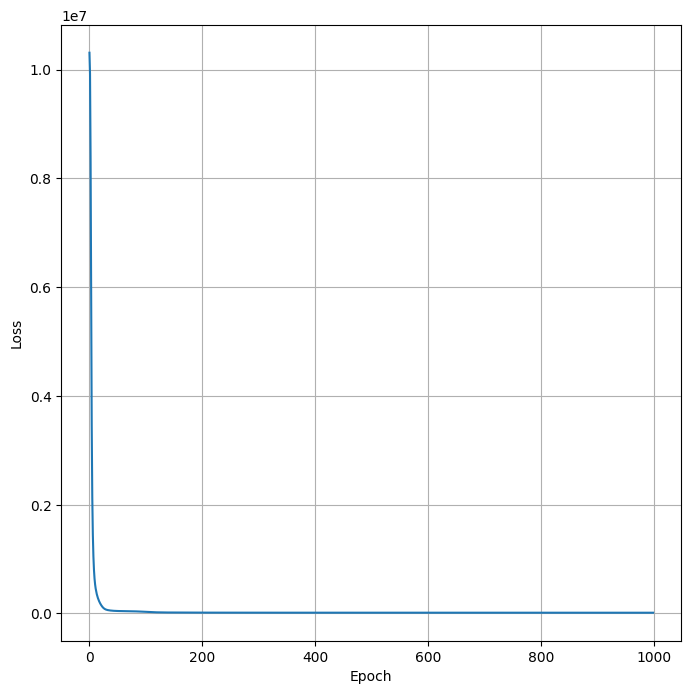

In [40]:
def LossHistory(history):
  #plt.plot(history.history['accuracy'], c="r", label='Accuracy')
  plt.plot(history.history['loss'], label='Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  #plt.legend()
  plt.grid(True)
  plt.show()

LossHistory(h)

5) Evaluate using the 𝑅" score (also known as coefficient of determina.on). Make sure the ANN model
performs beker than the Decision Tree.

In [45]:
y_pred = model.predict(Xtest)
r2 = r2_score(ytest, y_pred)
print('r2 for ANN model is: ', r2)

44/44 [==============================] - 0s 1ms/step
r2 for ANN model is:  0.9977262660665567


r2 score for *decision tree regressor* was: **0.9966396328742427**


6) Plot predicted vs. actual values

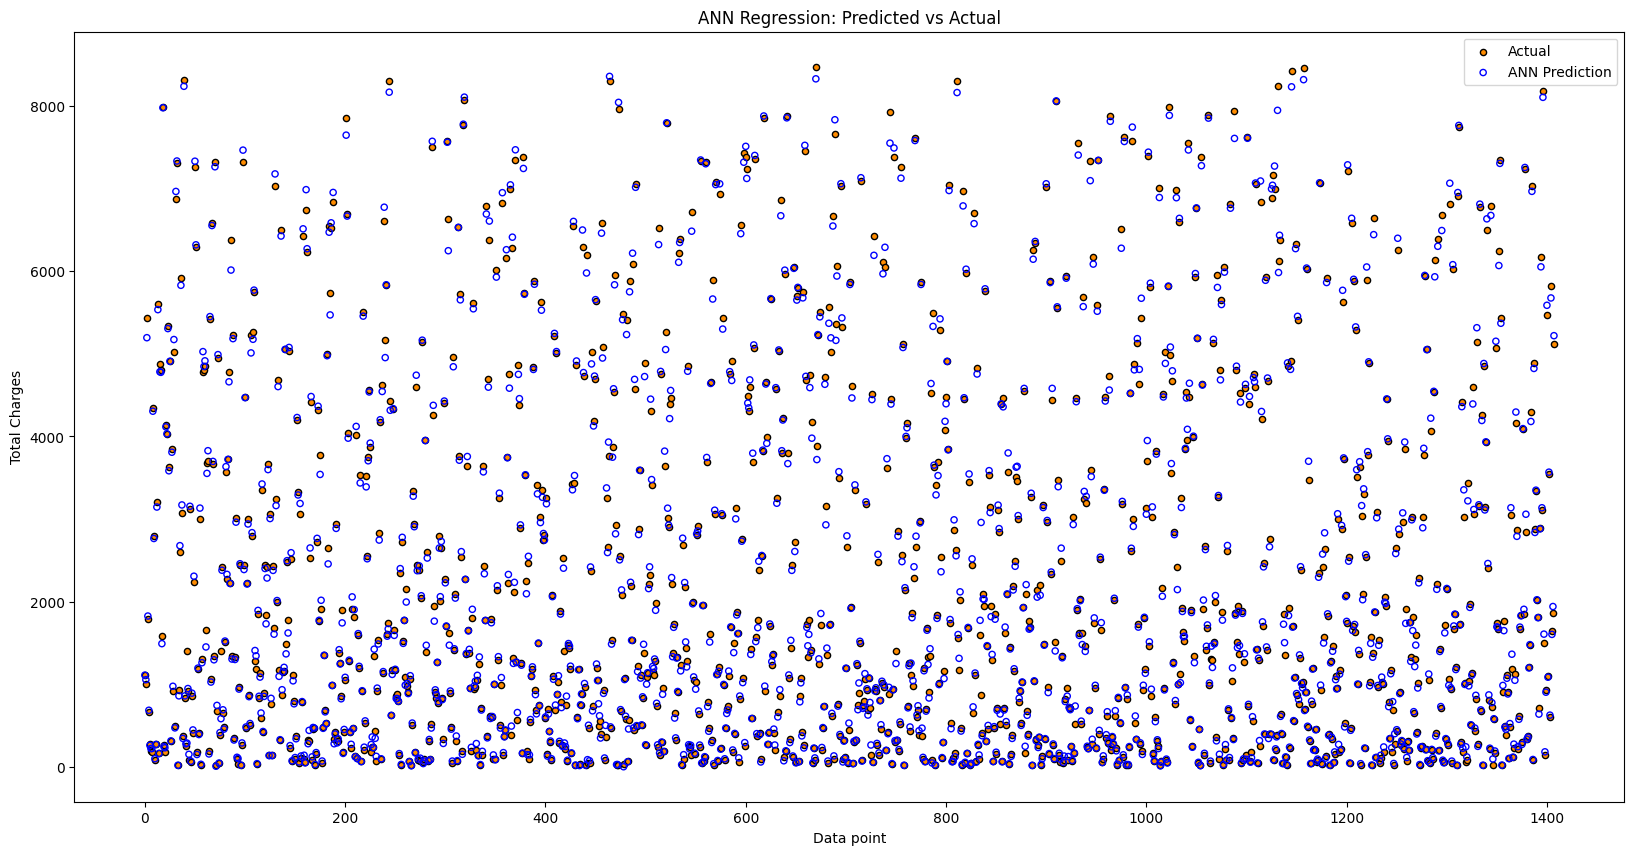

In [44]:
indices = np.arange(len(ytest))
plt.figure(figsize=(20,10))
plt.scatter(indices, ytest, s=20, edgecolor="black", c="darkorange", label="Actual")
plt.scatter(indices, y_pred, s=20, edgecolor="blue", c="none", label="ANN Prediction")
plt.xlabel("Data point")
plt.ylabel("Total Charges")
plt.title("ANN Regression: Predicted vs Actual")
plt.legend()
plt.show()